In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Geo=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/Geo_scores.csv")

In [4]:
Lambda=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/Lambda_wts.csv")

In [5]:
Qset=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/Qset_tats.csv")

In [6]:
Train=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/train.csv")

In [7]:
Test=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/test_share.csv")

In [8]:
Instance=pd.read_csv("/content/drive/MyDrive/Banking Domain-20251021T080826Z-1-001/Banking Domain/instance_scores.csv")

In [9]:
# shaw the row and the columns in the dataset
print(Geo.shape)

(1424035, 2)


In [10]:
print(Lambda.shape)

(1400, 2)


In [11]:
print(Qset.shape)

(1424035, 2)


In [12]:
print(Train.shape)

(227845, 28)


In [13]:
print(Test.shape)

(56962, 27)


In [14]:
print(Instance.shape)

(1424035, 2)


In [15]:
print(Geo.head(3))

       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17


In [16]:
print(Lambda.head(3))

    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
2  Grp188       0.39


In [17]:
print(Qset.head(3))

       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525                  1.03


In [18]:
print(Train.head(3))

       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   

       Per7      Per8  ...      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  0.340000  1.010000  ...  0.680000  0.726667  0.606667  1.010000  0.933333   
1  0.810000  0.783333  ...  0.716667  0.743333  0.680000  0.690000  0.560000   
2  0.056667  0.756667  ...  0.690000  0.820000  0.600000  0.383333  0.763333   

      Cred4     Cred5     Cred6  Normalised_FNT  Target  
0  0.603333  0.686667  0.673333        -245.750       0  
1  0.670000  0.553333  0.653333        -248.000       0  
2  0.670000  0.686667  0.673333        -233.125       0  

[3 rows x 28 columns]


In [19]:
print(Test.head(3))

       id   Group      Per1      Per2  Per3      Per4      Per5      Per6  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.570000  0.260000   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.910000  0.253333   
2   59727  Grp188  1.043333  0.740000  0.86  1.006667  0.583333  0.616667   

   Per7      Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.70  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333   
1  1.04  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333   
2  0.63  0.686667  ...  0.626667  0.756667  0.953333  0.623333  0.753333   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  
0  0.776667  0.796667  0.823333  0.783333       -249.7500  
1  0.806667  0.630000  0.673333  0.673333       -249.8125  
2  0.870000  0.596667  0.680000  0.670000       -248.1200  

[3 rows x 27 columns]


In [20]:
print(Instance.head(3))

       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44


In [21]:
print(Geo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [22]:
print(Lambda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.0+ KB
None


In [23]:
print(Qset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [24]:
print(Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [25]:
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56962 non-null  int64  
 1   Group           56962 non-null  object 
 2   Per1            56962 non-null  float64
 3   Per2            56962 non-null  float64
 4   Per3            56962 non-null  float64
 5   Per4            56962 non-null  float64
 6   Per5            56962 non-null  float64
 7   Per6            56962 non-null  float64
 8   Per7            56962 non-null  float64
 9   Per8            56962 non-null  float64
 10  Per9            56962 non-null  float64
 11  Dem1            56962 non-null  float64
 12  Dem2            56962 non-null  float64
 13  Dem3            56962 non-null  float64
 14  Dem4            56962 non-null  float64
 15  Dem5            56962 non-null  float64
 16  Dem6            56962 non-null  float64
 17  Dem7            56962 non-null 

In [26]:
print(Instance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None


In [31]:
print("--------Geo--------")
print(Geo.isnull().sum())
print("--------Lambda------")
print(Lambda.isnull().sum())
print("--------Qset------")
print(Qset.isnull().sum())
print("--------Train------")
print(Train.isnull().sum())
print("--------Test------")
print(Test.isnull().sum())
print("--------Instance------")
print(Instance.isnull().sum())

--------Geo--------
id               0
geo_score    71543
dtype: int64
--------Lambda------
Group        0
lambda_wt    0
dtype: int64
--------Qset------
id                           0
qsets_normalized_tat    103201
dtype: int64
--------Train------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64
--------Test------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0

In [36]:
print("****  unique id of the costmer ****")
print("--------Geo------")
print("Geo",Geo['id'].nunique())
print("--------Qset------")
print("Qset",Qset['id'].nunique())
print("--------Train------")
print("Train",Train['id'].nunique())
print("--------Test------")
print("Test",Test['id'].nunique())
print("--------Instance------")
print("Instance",Instance['id'].nunique())

****  unique id of the costmer ****
--------Geo------
Geo 284807
--------Qset------
Qset 284807
--------Train------
Train 227845
--------Test------
Test 56962
--------Instance------
Instance 284807


In [38]:
print("*****  unique Group to the customer  *****")
print("--------Lambda------")
print("Lambda",Lambda['Group'].nunique())
print("--------Test------")
print("Test",Test['Group'].nunique())

*****  unique Group to the customer  *****
--------Lambda------
Lambda 1400
--------Test------
Test 915


In [40]:
Geo.shape

(1424035, 2)

In [39]:
Geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [41]:
Instance.shape

(1424035, 2)

In [42]:
Instance.describe()

,id,instance_scores
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,-2.879143e-06
std,8.221673e+04,2.544506e+00
min,0.000000e+00,-1.231900e+02
25%,7.120100e+04,-6.400000e-01
50%,1.424030e+05,-4.000000e-02
75%,2.136050e+05,5.900000e-01
max,2.848060e+05,1.203500e+02


In [43]:
Qset.shape

(1424035, 2)

In [44]:
Qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


In [45]:
Geo = Geo.groupby('id').mean()
Instance = Instance.groupby('id').mean()
Qset = Qset.groupby('id').mean()

In [46]:
print(Geo.isnull().sum()/len(Geo)*100)
print(Qset.isnull().sum()/len(Qset)*100)

geo_score    0.0
dtype: float64
qsets_normalized_tat    0.0
dtype: float64


In [47]:
Geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 284806
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   geo_score  284807 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


<Axes: ylabel='geo_score'>

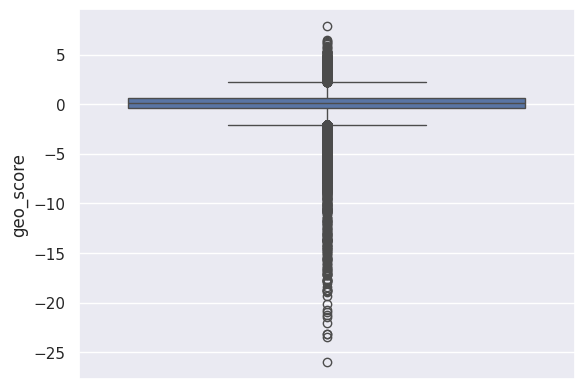

In [48]:
sns.boxplot(y='geo_score', data=Geo)

In [49]:
Qset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 284806
Data columns (total 1 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   qsets_normalized_tat  284807 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB


<Axes: ylabel='qsets_normalized_tat'>

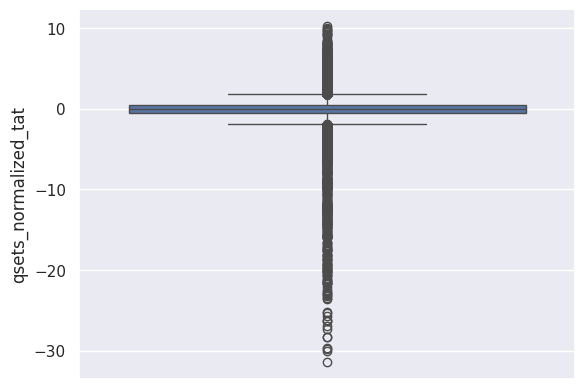

In [50]:
sns.boxplot(data=Qset,y='qsets_normalized_tat')

In [52]:
#--------- fill the misssing Value through the median ------------

In [53]:
Geo['geo_score']=Geo['geo_score'].fillna(Geo['geo_score'].median())
Qset['qsets_normalized_tat']=Qset['qsets_normalized_tat'].fillna(Qset['qsets_normalized_tat'].median())

In [55]:
print(Geo.isnull().sum()/len(Geo)*100)
print(Qset.isnull().sum()/len(Qset)*100)

geo_score    0.0
dtype: float64
qsets_normalized_tat    0.0
dtype: float64


In [56]:
Geo.describe()

,geo_score
count,284807.000000
mean,-0.000255
std,1.077606
min,-25.983333
25%,-0.430000
50%,0.150000
75%,0.650000
max,7.850000


In [57]:
Train['Target'].value_counts()

,count
Target,
0,227451
1,394


In [63]:
Train['data']='Train'
Test['data']='Test'

In [65]:
Train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,Train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,Train


In [64]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [66]:
# add both table togather ##
all_data = pd.concat([Train,Test],axis=0)

In [67]:
all_data.shape

(284807, 29)

In [69]:
print("--------Geo------")
print(Geo.isnull().sum())
print("--------Lambda------")
print(Lambda.isnull().sum())
print("--------Qset------")
print(Qset.isnull().sum())
print("--------Train------")
print(Train.isnull().sum())
print("--------Test------")
print(Test.isnull().sum())
print("--------Instance------")
print(Instance.isnull().sum())
# ---------- unique Group to the customer ---------
print("--------Lambda------")
print("Lambda",Lambda['Group'].nunique())
print("--------Test------")
print("Test",Test['Group'].nunique())

--------Geo------
geo_score    0
dtype: int64
--------Lambda------
Group        0
lambda_wt    0
dtype: int64
--------Qset------
qsets_normalized_tat    0
dtype: int64
--------Train------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
data              0
dtype: int64
--------Test------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0


In [70]:
all_data=pd.merge(all_data,Lambda,on='Group',how='left')

In [71]:
 all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,Train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,Train,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.60


In [72]:
all_data.shape

(284807, 30)

In [73]:
Lambda.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [74]:
all_data=pd.merge(all_data,Geo,on='id',how='left')

In [75]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,Train,-0.13,0.275
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,Train,0.66,-0.250
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.51,-0.950
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.72,0.490
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.60,0.850


In [76]:
all_data.shape

(284807, 31)

In [77]:
all_data=pd.merge(all_data,Instance,on='id',how='left')

In [78]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,Train,-0.13,0.275,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,Train,0.66,-0.250,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.51,-0.950,1.56
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.72,0.490,0.70
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.60,0.850,-0.47


In [79]:
all_data.shape

(284807, 32)

In [80]:
all_data=pd.merge(all_data,Qset,on='id',how='left')

In [81]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,Train,-0.13,0.275,-0.06,-0.700000
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,Train,0.66,-0.250,0.52,0.140000
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.51,-0.950,1.56,-0.430000
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.72,0.490,0.70,-0.516667
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.60,0.850,-0.47,-0.630000


In [82]:
all_data.shape

(284807, 33)

In [83]:
all_data['Group'].nunique()

1400

In [84]:
Lambda['Group'].nunique()

1400

In [85]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,Train,-0.13,0.275,-0.06,-0.700000
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,Train,0.66,-0.250,0.52,0.140000
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.51,-0.950,1.56,-0.430000
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.72,0.490,0.70,-0.516667
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.60,0.850,-0.47,-0.630000


In [86]:
Train = all_data[all_data['data']=='Train']
Test = all_data[all_data['data']=='Test']

In [87]:
Train.shape

(227845, 33)

In [88]:
Test.shape

(56962, 33)

In [89]:
Train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [90]:
Train = Train.drop(['id','data'],axis=1) # Building your Model
Test = Test.drop(['id','data'],axis=1) # Prediction and final result

In [91]:
Test.isnull().sum()

,0
Group,0
Per1,0
Per2,0
Per3,0
Per4,0
Per5,0
Per6,0
Per7,0
Per8,0
Per9,0


In [92]:
Test = Test.drop(['Target'],axis=1)

In [93]:
Train.isnull().sum()

,0
Group,0
Per1,0
Per2,0
Per3,0
Per4,0
Per5,0
Per6,0
Per7,0
Per8,0
Per9,0


In [94]:
# split the data into independent and dependent variable
x = Train.drop(['Target'],axis=1)
y = Train['Target']

In [95]:
# split the data into training and testing
x['Group'] = x['Group'].astype('category')
x['Group'] = x['Group'].cat.codes
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [99]:
Train['Group'] = Train['Group'].astype('category')
Train['Group'] = Train['Group'].cat.codes
Train['Group']

,Group
0,420
1,413
2,523
3,452
4,486
...,...
227840,491
227841,453
227842,632
227843,727


In [98]:
Test['Group'] = Test['Group'].astype('category')
Test['Group'] = Test['Group'].cat.codes
Test['Group']

,Group
227845,277
227846,180
227847,231
227848,485
227849,504
...,...
284802,11
284803,569
284804,765
284805,163


In [96]:
y_train.value_counts()

,count
Target,
0.0,181961
1.0,315


In [97]:
y_test.value_counts()

,count
Target,
0.0,45490
1.0,79


In [100]:
# Builing Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
y_pred_train = rfmodel.predict(x_train)
y_pred_test = rfmodel.predict(x_test)

In [103]:
from sklearn.metrics import classification_report ,accuracy_score

In [104]:
print(classification_report(y_train,y_pred_train))
print("$$$$$$$$$$")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

$$$$$$$$$$
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.70      0.80        79

    accuracy                           1.00     45569
   macro avg       0.97      0.85      0.90     45569
weighted avg       1.00      1.00      1.00     45569



In [105]:
print(accuracy_score(y_train,y_pred_train))
print("$$$$$$$$$$$$$")
print(accuracy_score(y_test, y_pred_test))

0.9999945138142158
$$$$$$$$$$$$$
0.9994074919353069


In [106]:
# please do cross-vailidation with train dataset

In [107]:
final_output = rfmodel.predict(Test)

In [108]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [109]:
final_output = pd.DataFrame(final_output)
final_output.columns


RangeIndex(start=0, stop=1, step=1)

In [110]:
final_output = final_output.rename(columns={0:'Target'})

In [111]:
final_output.to_csv("final_Target_value.csv")

In [115]:
#final_output_prediction = pd.concat([Test,final_output],axis=1)
final_output_prediction = pd.merge(Test,final_output,left_index=True,right_index=True,how='left')

In [118]:
final_output_prediction.isnull().sum()

,0
Group,0
Per1,0
Per2,0
Per3,0
Per4,0
Per5,0
Per6,0
Per7,0
Per8,0
Per9,0


In [116]:
final_output_prediction

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat,Target
227845,277,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,...,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76,0.2500,-0.04,-0.5375,NaN
227846,180,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,...,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18,0.4300,-0.77,-0.6200,NaN
227847,231,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,...,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39,1.3200,0.11,-0.5125,NaN
227848,485,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,...,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80,-2.1100,0.33,0.4625,NaN
227849,504,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,...,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89,-2.1100,-0.37,-0.1300,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,11,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,...,0.610000,0.690000,0.750000,0.700000,-249.5050,-0.40,-0.1875,-0.51,0.0100,NaN
284803,569,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,...,0.640000,0.883333,0.663333,0.660000,-248.7525,-1.54,0.1100,-0.46,0.0750,NaN
284804,765,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,...,0.603333,0.880000,0.643333,0.676667,-231.0500,0.29,-0.5300,0.65,-0.0200,NaN
284805,163,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,...,0.566667,0.616667,0.713333,0.706667,-246.3150,-0.69,0.2700,-0.92,0.6100,NaN
